## Engineering mixed variables

We've seen that mixed variables are those which values contain both numbers and labels (see section 2: types of variables for a re-cap).

How can we engineer this type of variable to use it in machine learning?

What we need to do in these cases is extract the categorical part in one variable, and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one.

**Scenario 1**
Some mixed variables, will contain among their values either strings or numbers, but not the 2 together. This means that the value of an observation is either a string, or a number, but not a string and a number.

There are cases, like I explained in section 2, in which the variable is in nature numerical, and whenever the number could not be established for an observation, a code (i.e., a string) is utilised to define that a) information could not be retrieved and b) why it could not be retrieved.

In situations like this, we can simply extract the string into a categorical variable, and the numbers into a numerical variable. We will end up with 2 variables that contain all the information contained in the single mixed variable. After this, we should engineer the numerical and categorical variables as we would do normally for those types of variables.

**Scenario 2**
In other cases, the variable will contain strings and numbers together for the same observation. After inspecting the variable, we can decide whether we should treat these types as categorical variables, or whether it will be more predictive if we separate the categorical and the numerical parts in different variables.


We will see below examples of these 2 scenarios, and how we can go about them.

For the first scenario I will simulate some data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# let's load the Lending Club dataset with the variable "Number of installment accounts opened in past 24 months"
# installment accounts are those that, at the moment of acquiring them, there is a set period and amount
# of repayments agreed between the lender and borrower. An example of this is a car loan, or a student loan.
# the borrower knows that they are going to pay a certain, fixed amount over, for example 36 months.

data = pd.read_csv('loan.csv', usecols=['id','open_il_24m'])

# let's replace the NaN with the fictitious codes described below:
# 'A': couldn't identify the person
# 'B': no relevant data
# 'C': person seems not to have any account open
# this is exactly what we did in section 2 of this course for the lecture on mixed types of variables

# select which observations we will replace with each code
indeces_b = data[data.open_il_24m.isnull()].sample(10000, random_state=44).index
indeces_c = data[data.open_il_24m.isnull()].sample(30000, random_state=42).index

# replace NA with the fictitious code
data.open_il_24m.fillna('A', inplace=True)
data.loc[indeces_b, 'open_il_24m']='B'
data.loc[indeces_c, 'open_il_24m']='C'

In [5]:
# let's inspect the mixed variable

data.open_il_24m.unique()

array(['C', 'A', 'B'], dtype=object)

The variable now is mixed: it contains both numbers and the three codes that we just created for this simulation.

Text(0, 0.5, 'Number of borrowers')

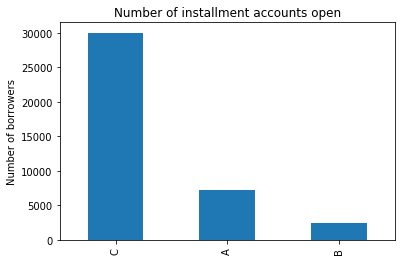

In [6]:
# the variable is also discrete in nature. A person can have 1, 2 accounts but not 2.3 accounts
# let's inspect the number of observations per value of the variable

fig = data.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

This is how a mixed variable looks like!

In [7]:
data.open_il_24m.head()

0    C
1    C
2    A
3    C
4    C
Name: open_il_24m, dtype: object

### Engineering mixed types of variables

Below I will demonstrate how to engineer mixed types of variables

In [8]:
# we create 2 variables, a numerical one containing the numerical part, and
# a categorical variable with the codes (strings)

data['open_il_24m_numerical'] = np.where(data.open_il_24m.str.isdigit(), data.open_il_24m, np.nan)
data['open_il_24m_categorical'] = np.where(data.open_il_24m.str.isdigit(), np.nan, data.open_il_24m,)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,C,NaN,C
2,1077175,A,NaN,A
3,1076863,C,NaN,C
4,1075358,C,NaN,C


The categorical variable captures the categorical part of the mixed original variable. Where the categorical variable contains a value, the numerical variable contains NA, and vice versa. See below.

In [9]:
# let's inspect those instances of the dataset where numerical is not null
# we can see that when the numerical variable is not null the categorical is null
# and vice versa

data.dropna(subset = ['open_il_24m_numerical'], axis=0)

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical


And now we are ready to use those variables in machine learning. We should pre-process them as we learnt in previous sections. For example,  we could fill the missing values of the categorical part with the new category 'Missing'. And then we could fill the NA of the numerical  part with a value far out in the distribution.

### Other types of mixed variables

In [10]:
# let's load again the titanic dataset for demonstration

data = pd.read_csv('titanic.csv', usecols = ['Ticket', 'Cabin', 'Survived'])
data.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


The variables Ticket and Cabin, are not strictly mixed in the sense that they do not contain numbers OR strings on different observations. They contains both numbers and strings in the same observation. Perhaps, if we separate them, we can add some information to the dataset. 

Let's have a look at what we could do:

In [11]:
# for Cabin, it is relatively straightforward, we can extract the letters and the numbers in different variables

data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # captures numerical part
data['Cabin_categorical'] = data['Cabin'].str[0] # captures the first letter

data[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85,C
2,NaN,NaN,NaN
3,C123,123,C
4,NaN,NaN,NaN


In [12]:
# ticket is not as clear...but we could still capture the first part of the ticket as a code (category)
# and the second part of the ticket as numeric

data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [13]:
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)

# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)

data[['Ticket', 'Ticket_numerical','Ticket_categorical']].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171,A/5
1,PC 17599,17599,PC
2,STON/O2. 3101282,3101282,STON/O2.
3,113803,113803,NaN
4,373450,373450,NaN
5,330877,330877,NaN
6,17463,17463,NaN
7,349909,349909,NaN
8,347742,347742,NaN
9,237736,237736,NaN


In [14]:
# let's compare the number of categories of the newly designed variables

print('Ticket_original no of labels: ', len(data.Ticket.unique()))
print('Cabin_original no of labels: ', len(data.Cabin.unique()))

print('Ticket_categorical no of labels: ', len(data.Ticket_categorical.unique()))
print('Cabin_categorical no of labels: ', len(data.Cabin_categorical.unique()))


Ticket_original no of labels:  681
Cabin_original no of labels:  148
Ticket_categorical no of labels:  44
Cabin_categorical no of labels:  9


We can see how we reduced quite a bit the number of categories with this simple pre-processing of the variables. Whether these newly designed variables are or not predictive of survival, remains to be tested. I will come back to this in the last section of this course. Meanwhile, go ahead and built machine learning algorithms with these new variables, and see if they boost the performance.